<a href="https://colab.research.google.com/github/LeeSeungwon89/Lecture-and-self-study/blob/master/6%201%20%EA%B5%B0%EC%A7%91%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98(%EC%9E%91%EC%97%85%20%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 알고리즘

## 비지도 학습

- 타깃이 없을 때 사용하는 머신러닝 알고리즘.

## 데이터 준비

In [56]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# 코랩에서 '!' 문자로 시작하면 이후 명령을 파이썬 코드가 아니라 리눅스 셸(shell) 명령으로 이해함.
# 'wget' 명령은 원격 주소에서 데이터를 다운로드 하여 저장함.
# '-O' 옵션(숫자 0이 아니라 영어 대문자 O)을 사용하여 저장할 파일 이름을 지정함.
# 이 명령을 실행한 후에 코랩 왼쪽의 파일 탭을 열면 'fruits_300.npy' 가 저장되어 있음.

--2021-07-12 11:08:40--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-12 11:08:40--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-12 11:08:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [65]:
# 먼저 3차원 배열과 인덱싱 하는 방법에 대해 설명함
# 아래 배열은 0 ~ 23까지 숫자로 이루어진 3차원 배열임.
# 'reshape(2, 3, 4)' 는 깊이가 2, 행이 3, 열이 4인 3차원 배열로 바꾸는 함수임.
# '[[]]' 로 이루어진 덩어리 2개가 존재함. 이를 깊이라고 부름.
a = np.arange(24).reshape(2, 3, 4)
print(a)

# 깊이가 1인 배열 전체를 출력함.
# '\n'은 줄바꿈 기능을 가진 이스케이프 문자임. 출력 결과를 보기 좋도록 추가함.
print('\n깊이가 1인 배열 전체\n', a[0]) 
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]

# 깊이가 2인 배열 전체를 출력함.
print('\n깊이가 2인 배열 전체\n', a[1])
# [[12 13 14 15]
#  [16 17 18 19]
#  [20 21 22 23]]

# 깊이가 1, 행이 1인 배열을 출력함.
print('\n깊이가 1, 행이 1인 배열\n', a[0, 0])
# [0 1 2 3]

# 깊이가 2, 행이 1인 배열을 출력함.
print('\n깊이가 2, 행이 1인 배열\n', a[1, 0])
# [12 13 14 15]

# 깊이가 1, 행이 1, 열이 1인 배열을 출력함.
print('\n깊이가 1, 행이 1, 열이 1인 원소\n', a[0, 0, 0])
# 0

# 깊이가 2, 행이 3, 열이 4인 배열을 출력함.
print('\n깊이가 2, 행이 3, 열이 4인 원소\n', a[1, 2, 3])
# 23

# 깊이가 2, 행이 3, 열이 전체인 배열을 출력함.
# ':' 슬라이싱 연산자를 사용하면 해당 부분의 전체를 선택함.
# 슬라이싱 연산자를 지정하지 않아도 해당 부분의 전체를 선택함.
print('\n깊이가 2, 행이 3, 열이 전체인 배열\n', a[1, 2, :])
print('\n깊이가 2, 행이 3, 열이 전체인 배열(슬라이싱 연산자 생략)\n', a[1, 2])
# [20 21 22 23]

# 깊이가 2, 행이 전체, 열이 1인 배열을 출력함.
print('\n깊이가 2, 행이 전체, 열이 1인 배열\n', a[1, :, 0])
# [12 16 20]

# 깊이가 전체, 행이 전체, 열이 1인 배열을 출력함.
print('\n깊이가 전체, 행이 전체, 열이 1인 배열\n', a[:, :, 0])
# [[ 0  4  8]
#  [12 16 20]]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

깊이가 1인 배열 전체
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

깊이가 2인 배열 전체
 [[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]

깊이가 1, 행이 1인 배열
 [0 1 2 3]

깊이가 2, 행이 1인 배열
 [12 13 14 15]

깊이가 1, 행이 1, 열이 1인 원소
 0

깊이가 2, 행이 3, 열이 4인 원소
 23

깊이가 2, 행이 3, 열이 전체인 배열
 [20 21 22 23]

깊이가 2, 행이 3, 열이 전체인 배열(슬라이싱 연산자 생략)
 [20 21 22 23]

깊이가 2, 행이 전체, 열이 1인 배열
 [12 16 20]

깊이가 전체, 행이 전체, 열이 1인 배열
 [[ 0  4  8]
 [12 16 20]]


In [58]:
# 과일 사진 데이터를 읽음.
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits, fruits.shape)
# '(300, 100, 100)' 로 이루어진 3차원 배열이며
# 첫 번째 차원(300)은 샘플 개수,
# 두 번째 차원(100)은 이미지 높이,
# 세 번째 차원(100)은 이미지 너비,
# 이미지 크기(배열 크기)는 '높이 x 너비' 인 '100 x 100' 이고
# 각 배열의 원소는 픽셀에 대응함.
# 다시 설명하면 '[[]]' 로 묶인 2차원 배열(샘플)이 300개 존재하며,
# 2차원 배열(샘플) 하나는 행(높이)이 100개, 열(너비)이 100개임.
# 즉 하나의 2차원 배열에 '[]' 로 묶인 1차원 행(높이)이 100개이며 열(너비)은 100개임.

[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 ...

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]] (300, 100, 100)


[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


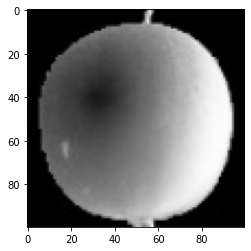

In [59]:
# 첫 번째 이미지의 첫 행을 출력함.
# 3차원 배열이므로 처음 인덱스 2개를 0으로 지정하고
# 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자를 쓰면
# 첫 번째 이미지의 첫 번째 행을 모두 선택할 수 있음.
print(fruits[0, 0, :])
# 첫 번째 행에 있는 픽셀 100개에 든 값을 출력함.
# 흑백 사진을 담고 있으므로 0 ~ 255까지의 정숫값을 가짐.

# 그림으로 그림. 'imshow()' 함수로 넘파이 배열로 저장된 이미지를 그림.
# 'cmap' 매개변수를 'gray' 로 설정하여 흑백 이미지로 그림.
plt.imshow(fruits[0], cmap = 'gray')

plt.show()
# 사과 이미지이며, 첫 번째 행이 위에서 출력한 배열 값에 해당함.
# 0에 가까울수록 검고, 높은 값을 밝음.